In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv("collegePhysics1.csv")

data.head(30)

,Year,Semester,SI N,"SI Combined A, B, C",SI Combined DF,W/I,GPA SI,# of SI Session Offered,Total Contact Hrs of Participating SI Students,Mean # of Sessions Attended,Mean Size of SIS,Total Contact Hours of Students Who Met With SI Leader During Office Hours,Mean SI Participant Evaluation of Helpfulness of SI Sessions (1=low to 5=high),Non-SI N,"Non-SI Combined A,B, C",Non-SI Combined DF,W/I,GPA Non SI
0,2000.5,Spring,12,12,0,0,2.83,48.0,45,4,1,NaN,4.27,14,13,1,1,2.69
1,2003.0,Fall,14,14,0,0,3.07,41.0,152,11,4,NaN,4.14,27,14,13,7,2.40
2,2003.5,Spring,13,12,1,0,2.54,34.0,53,4,2,NaN,4.35,19,13,6,1,2.39
3,2004.5,Spring,12,9,3,0,2.17,37.0,56,5,2,NaN,3.40,19,15,4,1,2.11
4,2005.0,Fall,17,10,7,1,1.88,39.0,57,3,1,NaN,3.41,25,16,9,3,1.91
5,2005.5,Spring,14,14,0,0,3.07,41.0,152,11,4,NaN,4.14,27,14,13,7,2.40
6,2006.0,Fall,4,0,4,1,0.00,14.0,26,7,2,NaN,3.80,30,15,15,0,1.70
7,2006.5,Spring,8,8,0,0,2.75,34.0,20,3,1,NaN,3.85,15,13,2,0,2.27
8,2007.0,Fall,9,7,2,0,1.89,8.0,9,1,1,NaN,0.00,33,24,6,3,2.13
9,2007.5,Spring,1,1,0,0,2.00,33.0,1,1,0,NaN,0.00,20,16,4,0,2.35


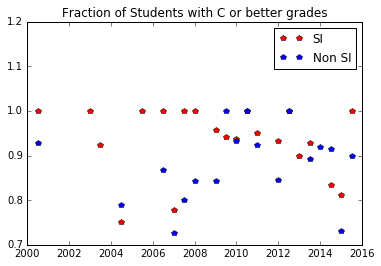

In [113]:
fraction_good_SI = data["SI Combined A, B, C"]/data["SI N"]
fraction_good_NonSI = data["Non-SI Combined A,B, C"]/data["Non-SI N"]
#fraction_nogood_SI = data[" SI Combined DF "]/data["SI N"]
#fraction_nogood_NonSI = data["Non-SI Combined DF"]/data["Non-SI N"]

x = data['Year']

plt.plot(x, fraction_good_SI, "pr", label="SI")
plt.plot(x, fraction_good_NonSI, "pb",  label="Non SI")
plt.legend(loc="best")
plt.title("Fraction of Students with C or better grades")
plt.ylim(0.7, 1.2)

plt.show()

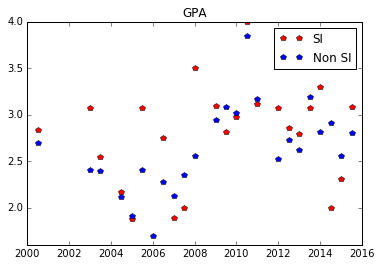

In [114]:
gpa_si = data["GPA SI"]
gpa_Nonsi = data["GPA Non SI"]

plt.plot(x, gpa_si, "pr", label="SI")
plt.plot(x, gpa_Nonsi, "pb",  label="Non SI")
plt.legend(loc="best")
plt.title("GPA")
plt.ylim(1.6, 4.0)
plt.show()

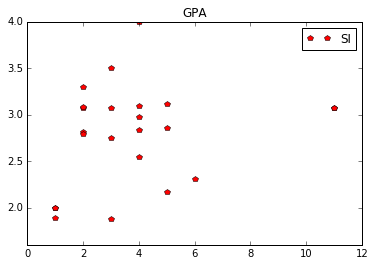

In [115]:
#Class size vs GPA SI vs Non SI
meanSS_si = data["Mean # of Sessions Attended"]
gpa_si = data["GPA SI"]

#gpa_si.hist()
plt.plot(meanSS_si, gpa_si, "pr", label="SI")

plt.legend(loc="best")
plt.title("GPA")
plt.ylim(1.6, 4.0)
plt.show()


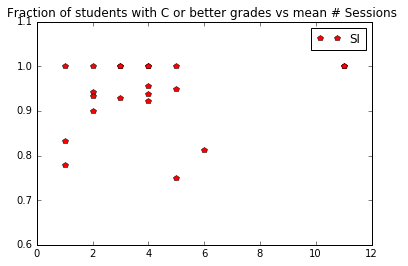

In [116]:
#Class size vs GPA SI vs Non SI
gpa_si = data["GPA SI"]

#gpa_si.hist()
plt.plot(meanSS_si, fraction_good_SI, "pr", label="SI")

plt.legend(loc="best")
plt.title("Fraction of students with C or better grades vs mean # Sessions ")
plt.ylim(0.6, 1.1)
plt.show()



0     4.27
1     4.14
2     4.35
3     3.40
4     3.41
5     4.14
6     3.80
7     3.85
8     0.00
9     0.00
10    4.23
11    4.24
12    3.84
13    4.71
14    4.20
15    4.70
16    4.43
17    4.42
18    4.00
19    5.00
20    3.50
21    4.60
22    3.93
23    4.63
Name: Mean SI Participant Evaluation of Helpfulness of SI Sessions (1=low to 5=high)\n, dtype: float64


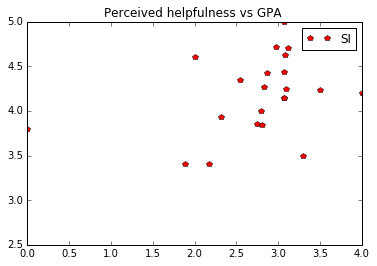

In [124]:
#Perceived helpfulness vs letter grade OR GPA
print data.iloc[:,12]
perceived_helpfulness = data.iloc[:,12]
plt.plot(gpa_si, perceived_helpfulness, "pr", label="SI")

plt.legend(loc="best")
plt.title("Perceived helpfulness vs GPA ")
plt.ylim(2.5, 5)
plt.show()